# DA Final project :
# Group G
# Supermarket chain in Myanmar - Data analysis and Visualisation
***


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
url = 'https://raw.githubusercontent.com/amitgido/Data_analysis_final_project/main/supermarket%20sales.csv'
supermarket_df = pd.read_csv(url)

In [3]:
supermarket_df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


---
> ### 1. Data Wrangling

In [4]:
supermarket_df.dtypes

Invoice ID                  object
Branch                      object
City                        object
Customer type               object
Gender                      object
Product line                object
Unit price                 float64
Quantity                     int64
Tax 5%                     float64
Total                      float64
Date                        object
Time                        object
Payment                     object
cogs                       float64
gross margin percentage    float64
gross income               float64
Rating                     float64
dtype: object

#### 1.1 Change the date column to a date type :
- Add a Weekday column.
    - Invert the Date column to a datetime64 type.
    - Add a new column of the weekday by the special `.dt.strftime('%A')` method.
<p>
- Seprate the date column to different columns with `.Datetime()` method.
<p>
- Delete the origianl Date column by `.drop()`.

In [5]:
supermarket_df['Date'] = pd.DatetimeIndex(supermarket_df.Date)
supermarket_df['Weekday'] = supermarket_df['Date'].dt.strftime('%A')
supermarket_df['Day'] = pd.DatetimeIndex(supermarket_df.Date).day
supermarket_df['Month'] = pd.DatetimeIndex(supermarket_df.Date).month
supermarket_df['Year'] = pd.DatetimeIndex(supermarket_df.Date).year
supermarket_df = supermarket_df.drop('Date', 1) #Date column is no longer necessaryאם תריצו פעמיים זה יקרוס כי הוא ינסה למחוק עמודה שלא קיימת

In [6]:
supermarket_df.dtypes

Invoice ID                  object
Branch                      object
City                        object
Customer type               object
Gender                      object
Product line                object
Unit price                 float64
Quantity                     int64
Tax 5%                     float64
Total                      float64
Time                        object
Payment                     object
cogs                       float64
gross margin percentage    float64
gross income               float64
Rating                     float64
Weekday                     object
Day                          int64
Month                        int64
Year                         int64
dtype: object

#### 1.3 Change customer type to Member boolean
- Rename the Customer type column to a Member column by `.rename()`.
<p>
- Replace the values to boolean by `.replace()`.

In [7]:
supermarket_df.rename({'Customer type': 'Member'}, axis=1, inplace=True)
supermarket_df = supermarket_df.replace({'Member': {'Member': True, 'Normal': False}})
supermarket_df.head()

,Invoice ID,Branch,City,Member,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Time,Payment,cogs,gross margin percentage,gross income,Rating,Weekday,Day,Month,Year
0,750-67-8428,A,Yangon,True,Female,Health and beauty,74.69,7,26.1415,548.9715,13:08,Ewallet,522.83,4.761905,26.1415,9.1,Saturday,5,1,2019
1,226-31-3081,C,Naypyitaw,False,Female,Electronic accessories,15.28,5,3.8200,80.2200,10:29,Cash,76.40,4.761905,3.8200,9.6,Friday,8,3,2019
2,631-41-3108,A,Yangon,False,Male,Home and lifestyle,46.33,7,16.2155,340.5255,13:23,Credit card,324.31,4.761905,16.2155,7.4,Sunday,3,3,2019
3,123-19-1176,A,Yangon,True,Male,Health and beauty,58.22,8,23.2880,489.0480,20:33,Ewallet,465.76,4.761905,23.2880,8.4,Sunday,27,1,2019
4,373-73-7910,A,Yangon,False,Male,Sports and travel,86.31,7,30.2085,634.3785,10:37,Ewallet,604.17,4.761905,30.2085,5.3,Friday,8,2,2019


#### 1.4 Assign number to each branch
- Replace the letters to numeric values.

In [8]:
supermarket_df = supermarket_df.replace({'Branch': {'A': 1, 'B': 2, 'C': 3}})
supermarket_df.head()

,Invoice ID,Branch,City,Member,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Time,Payment,cogs,gross margin percentage,gross income,Rating,Weekday,Day,Month,Year
0,750-67-8428,1,Yangon,True,Female,Health and beauty,74.69,7,26.1415,548.9715,13:08,Ewallet,522.83,4.761905,26.1415,9.1,Saturday,5,1,2019
1,226-31-3081,3,Naypyitaw,False,Female,Electronic accessories,15.28,5,3.8200,80.2200,10:29,Cash,76.40,4.761905,3.8200,9.6,Friday,8,3,2019
2,631-41-3108,1,Yangon,False,Male,Home and lifestyle,46.33,7,16.2155,340.5255,13:23,Credit card,324.31,4.761905,16.2155,7.4,Sunday,3,3,2019
3,123-19-1176,1,Yangon,True,Male,Health and beauty,58.22,8,23.2880,489.0480,20:33,Ewallet,465.76,4.761905,23.2880,8.4,Sunday,27,1,2019
4,373-73-7910,1,Yangon,False,Male,Sports and travel,86.31,7,30.2085,634.3785,10:37,Ewallet,604.17,4.761905,30.2085,5.3,Friday,8,2,2019


### 1.5 Noisy data
##### Boxplot all numberic data to check for discrepancy

In [9]:
df_to_plot = supermarket_df.drop(columns=['gross margin percentage','Time','Day','Month','Year'])
df_to_plot = df_to_plot.select_dtypes(include=np.number)

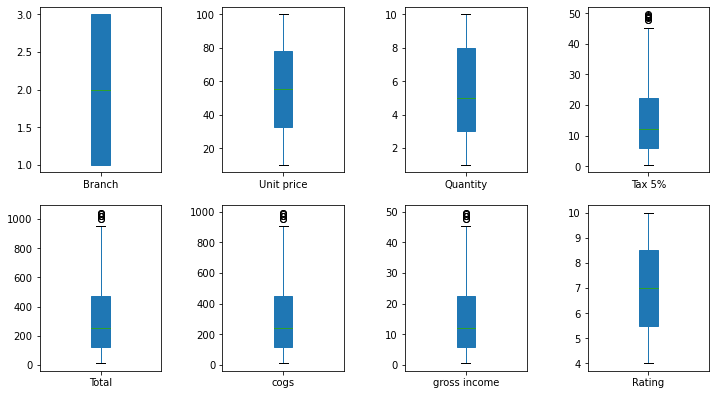

In [10]:
#subplots
df_to_plot.plot(subplots=True, layout=(4,4), kind='box', figsize=(12,14), patch_artist=True)
plt.subplots_adjust(wspace=0.5);

In [11]:
supermarket_df['Total'].max()
#having checked maximum value for total and due to the fact that tax,income and cogs are based on that, we can saftley say all values are in order.

1042.65

---
> ### 2. Correlations

array([[<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>]], dtype=object)

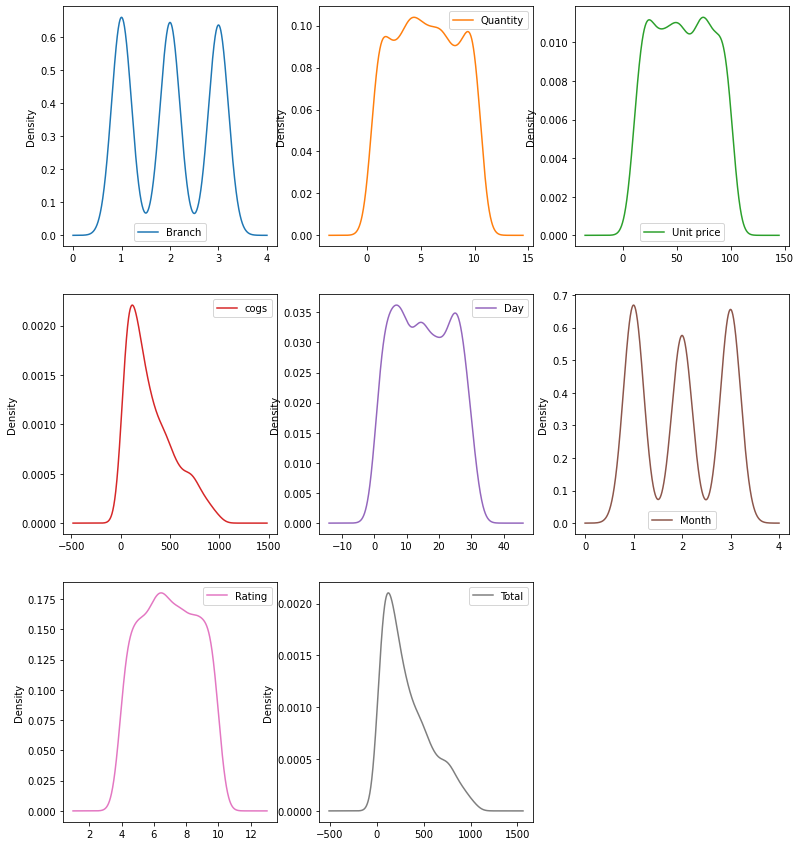

In [12]:
features = ['Branch','Quantity','Unit price','Time','cogs','Day','Month','Rating','Total']
supermarket_df[features].plot.density(subplots=True, sharex=False, sharey=False, layout=(3, 3), figsize=(13,15))

<AxesSubplot:>

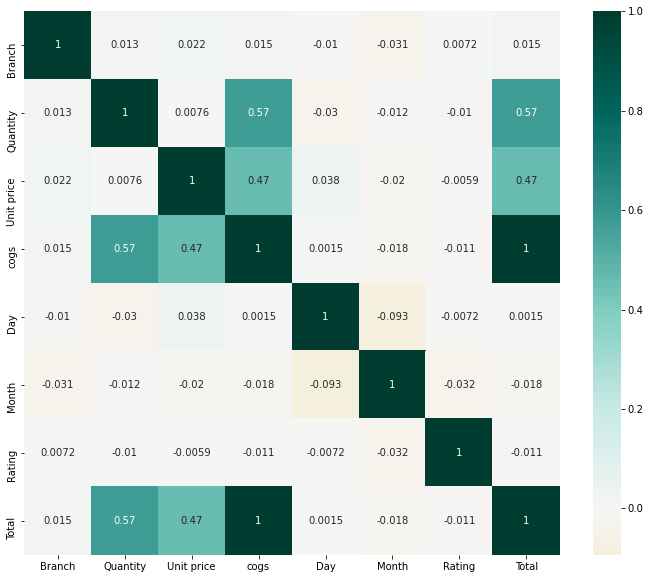

In [13]:
corrs = supermarket_df[features].corr(method = 'kendall')

plt.figure(figsize=(12,10))  #figure size
sns.heatmap(corrs, cmap='BrBG', center=0, annot = True )


---
> ### 3. הבנת הרגלי הצריכה התרבותיים במיניאמר

<div style="direction:rtl"> 
מטרתנו להבין את הרגלי הצריכה במיניאמר לכן עלינו לבצע מספר שלבים בכדי לנתח הרגלים אלו
בשלב הראשון בדקנו האם קיים קשר בין כמות ההוצאות ביחס למועדים וחגים בחתך של חודש קלנדרי ולהסיק מכך לגבי הרגלי הצריכה
<div

In [14]:
january_df = supermarket_df.loc[supermarket_df["Month"] == 1].groupby('Day')[['Total']].sum()
february_df = supermarket_df.loc[supermarket_df["Month"] == 2].groupby('Day')[['Total']].sum()
march_df = supermarket_df.loc[supermarket_df["Month"] == 3].groupby('Day')[['Total']].sum()

- Plot 3 subplots by  `plt.subplots()`.
<p>
- Get same scale on X axis by `sharex=True`.
<p>
- Add the text for Holidays by `plt.text()`.
<p>
- Add mean vertical line for eaxh month by `plt.axvline()`.
<p>
- Changing the colors by `sns.palette`.
<p>
- Get Horizonal graph by `sns.orient = "h"`.
    
    

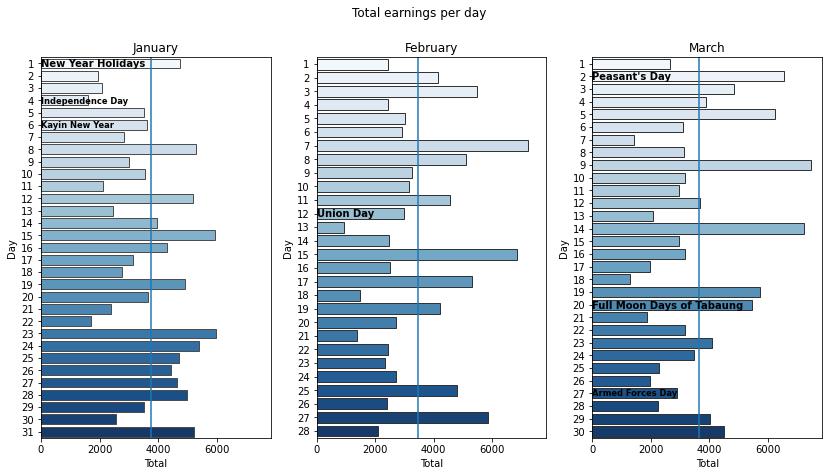

In [15]:
fig, axes = plt.subplots(1, 3, figsize=(14, 7), sharey=False, sharex=True)

fig.suptitle('Total earnings per day')

###january###
sns.barplot(ax=axes[0], x=january_df["Total"], y=january_df.index,orient = "h", edgecolor=".3", palette="Blues")
axes[0].set_title("January") #add label for january.
#text additions
axes[0].text(0, 0.3, "New Year Holidays", horizontalalignment='left', size='medium', color='black', weight='semibold')
axes[0].text(0, 3.3, "Independence Day", horizontalalignment='left', size='small', color='black', weight='semibold')
axes[0].text(0, 5.2, "Kayin New Year", horizontalalignment='left', size='small', color='black', weight='semibold')

mean = january_df["Total"].mean()
axes[0].axvline(mean)

###february###
sns.barplot(ax=axes[1], x=february_df["Total"], y=february_df.index,orient = "h", edgecolor=".2",errcolor=".2", palette="Blues")
axes[1].set_title("February") #add label for february.
#text additions
axes[1].text(0, 11.2, "Union Day", horizontalalignment='left', size='medium', color='black', weight='semibold')

mean = february_df["Total"].mean()
axes[1].axvline(mean)

###march###
sns.barplot(ax=axes[2], x=march_df["Total"], y=march_df.index,orient = "h", edgecolor=".2",errcolor=".2", palette="Blues")
axes[2].set_title("March") #add label for march.
#text additions
axes[2].text(0, 1.3, "Peasant's Day", horizontalalignment='left', size='medium', color='black', weight='semibold')
axes[2].text(0, 19.3, "Full Moon Days of Tabaung", horizontalalignment='left', size='medium', color='black', weight='semibold')
axes[2].text(0, 26.15, "Armed Forces Day", horizontalalignment='left', size='small', color='black', weight='semibold')

mean = march_df["Total"].mean()
axes[2].axvline(mean)

<div style="direction:rtl"> 
ניתן לראות כי לא קיימים הרגלי צריכה קבועים מבחינת מועדים וחגים, לכן ננסה להבין את הרגלי הצריכה בחתך יומי על פי כמות האנשים שפוקדים את הסניפים.
<div

In [24]:
week_df = supermarket_df.groupby(['Weekday'])[['Invoice ID']].count()
labels = ['Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday']
week_df.reindex(labels)

,Invoice ID
Weekday,
Sunday,133
Monday,125
Tuesday,158
Wednesday,143
Thursday,138
Friday,139
Saturday,164


Visualize the table:
- Organize the weekdays order by `plt.reindex()`.
<p>
- Change the colors by `plt.colors()`

array([<AxesSubplot:ylabel='Invoice ID'>], dtype=object)

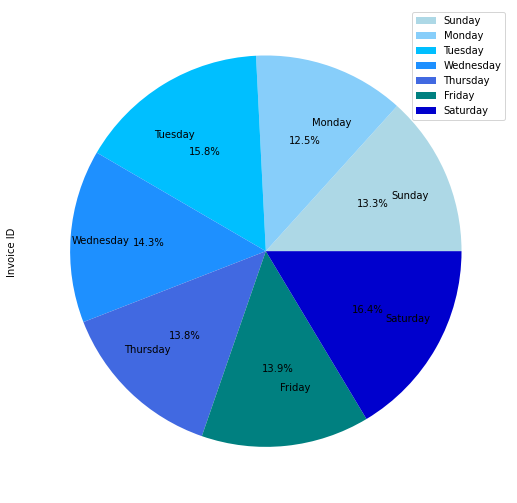

In [17]:
labels = ['Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday'] #days
colors = ['lightblue','lightskyblue','deepskyblue','dodgerblue','royalblue','teal','mediumblue'] #colors
weekday_df=supermarket_df.groupby(['Weekday'])[['Invoice ID']].count()
weekday_df.reindex(labels).plot(kind='pie', subplots=True,colors = colors, autopct='%1.1f%%',figsize=(9,9), labeldistance=0.7) #add pecentage and change the label distance.

---
>##### Observation 1:
>
><div style="direction:rtl"> 
לסיכום, ניתן לראות שאין שינויים משמעותיים במועדים משמעותיים כפי שציפינו לראות, יתרה מכך דפוסי הקנייה אינם חוזרים על עצמם. ציפינו לראות קנייות מרובות לפני חגים או מועדים משמעותיים.
>לכן נמליץ לייצר מבצעים ולהגדיל את ההיצע כדי למשוך קהל נוסף של אנשים ולהגדיל את המכירות ובמקביל לחזק בעובדים.
>כמו כן,אנו מציעים לחזק את הצוות בימים עמוסים (שבת, שלישי) ולהגביל את הצוות בימים עמוסים פחות (שני, ראשון)



> ### 4. הבנת הרגלי הצריכה לפי קטגוריות שונות ביחס לסניפים ומחלקות  

 
- Converting the 'Time' column to datetime type by `pd.to_datetime` and agg the values to discrete hours by `.dt.hour`.
<p>
- Groupby 'Hour' and agg the columns by relevant data by `.agg`.



    
    

><div style="direction:rtl"> 
המטרה של הטבלה, לאגד את התונים לפי שעות בדידות באמצעות ערכים רלוונטים :

><div style="direction:rtl"
המטרה של הטבלה - לאגד את הנתונים לפי שעות בדידות לפי הקטגוריות השונות וערכים רלוונטים


In [18]:
supermarket_df['Time'] = pd.to_datetime(supermarket_df['Time'])
supermarket_df['Hour'] = (supermarket_df['Time']).dt.hour
supermarket_df['Hour'].unique()
supermarket_df.groupby(['Hour']).agg({'Invoice ID': 'count', 'Quantity': 'sum','Total':'mean', 'Rating' :'mean'}).round(2)

,Invoice ID,Quantity,Total,Rating
Hour,,,,
10,101,525,311.10,7.10
11,90,513,337.53,6.81
12,89,501,292.88,7.30
13,103,585,337.12,7.03
14,83,495,371.43,6.93
15,102,530,305.68,6.88
16,77,420,327.61,6.86
17,74,415,330.34,6.94
18,93,475,279.90,7.19


Visualize the table:
- Creat DF for each city by `.str.contains()` to 'City' Column.
<p>
- Create lineplot for each column and add a mean line in addition.
<p>
- Add coordinates by `.grid()`
    
   

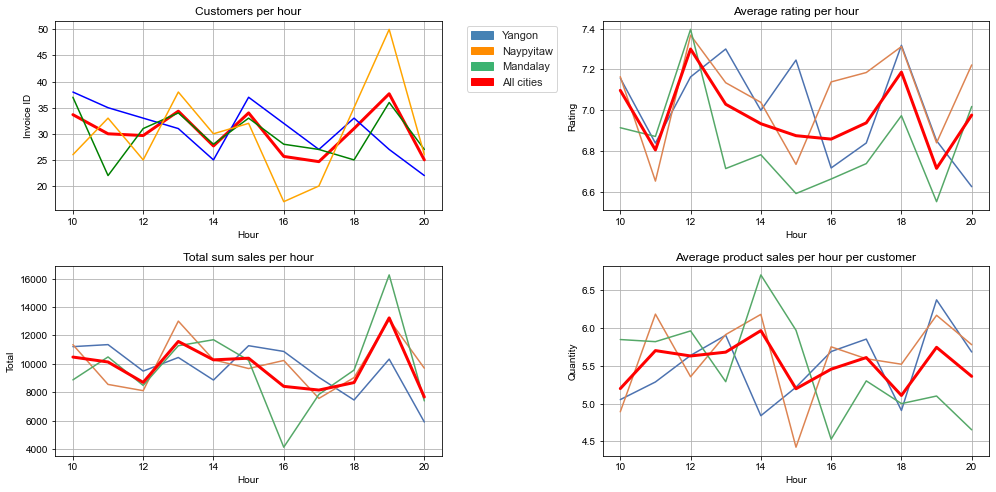

In [19]:

Yangon_DF = supermarket_df[supermarket_df['City'].str.contains('Yangon')]
Naypyitaw_DF = supermarket_df[supermarket_df['City'].str.contains('Naypyitaw')]
Mandalay_DF = supermarket_df[supermarket_df['City'].str.contains('Mandalay')]

fig, axes = plt.subplots(2, 2, figsize=(14, 7))
sns.set(style="ticks") #set coordinates style
custumercount = supermarket_df.groupby(['Hour'])[['Invoice ID']].count().div(3) #div(3) to get the mean
custumercount_yagon = Yangon_DF.groupby(['Hour'])[['Invoice ID']].count()
custumercount_Naypyitaw = Naypyitaw_DF.groupby(['Hour'])[['Invoice ID']].count()
custumercount_Mandalay = Mandalay_DF.groupby(['Hour'])[['Invoice ID']].count()
meanTotalbyHR= supermarket_df.groupby(['Hour'])[['Total']].sum().div(3) #div(3) to get the mean

sns.lineplot(ax=axes[0,0],x="Hour",  y = 'Invoice ID',data =custumercount, color='red', linewidth=3).set_title("Customers per hour")
sns.lineplot(ax=axes[0,0],x="Hour",  y = 'Invoice ID',data =custumercount_yagon, color='blue')
sns.lineplot(ax=axes[0,0],x="Hour",  y = 'Invoice ID',data =custumercount_Naypyitaw, color='green')
sns.lineplot(ax=axes[0,0],x="Hour",  y = 'Invoice ID',data =custumercount_Mandalay, color='orange')

sns.lineplot(ax=axes[0,1],x="Hour",hue = 'City',  y = 'Rating' ,data =supermarket_df, err_style=None).set_title("Average rating per hour") #err_style for remove the err marker
sns.lineplot(ax=axes[0,1],x="Hour",  y = 'Rating',data =supermarket_df, color='red', err_style=None, linewidth=3) #mark the all cities red line

sns.lineplot(ax=axes[1,0],x="Hour",hue = 'City', y = 'Total',data =supermarket_df,estimator=sum, err_style=None).set_title("Total sum sales per hour")
sns.lineplot(ax=axes[1,0],x="Hour",  y = 'Total',data =meanTotalbyHR, color='red', err_style=None, linewidth=3) #mark the all cities red line

sns.lineplot(ax=axes[1,1],x="Hour",hue = 'City',  y = 'Quantity',data =supermarket_df, err_style=None).set_title("Average product sales per hour per customer")
sns.lineplot(ax=axes[1,1],x="Hour",  y = 'Quantity',data =supermarket_df, color='red', err_style=None, linewidth=3)

#add unit legend for all 4 plots.
bar1 = mpatches.Patch(color='steelblue', label='Yangon')
bar2 = mpatches.Patch(color='darkorange', label='Naypyitaw')
bar3 = mpatches.Patch(color='mediumseagreen',label='Mandalay')
bar4= mpatches.Patch(color='red', label='All cities')
axes[0,0].legend(handles=[bar1,bar2,bar3,bar4],bbox_to_anchor= (1.05,1)) 

#remove all sub legends.
axes[0,1].legend([],[], frameon=False)
axes[1,0].legend([],[], frameon=False)
axes[1,1].legend([],[], frameon=False)
#add coordinates 
axes[0,0].grid()
axes[0,1].grid()
axes[1,0].grid()
axes[1,1].grid()
plt.tight_layout()
plt.show()



<div style="direction:rtl"> לאחר שהבנו שהרגלי צריכה חודשיים/שבועיים אינם קיימים, בחרנו להתמקד בצריכה היומית לפי שעות היום על מנת ללמוד על התנהגות הצריכה היומית בסניפים השונים. <br>
בגרף ממוצע לקוחות לפי שעות היום ניתן לראות שכמות הלקוחות בשעות הערב (18:00-20:00) מתגברת ומגיעה לשיאה, מנגד בגרף דירוג חווית הקניה לפי שעות היום ניתן לראות שדירוג חווית הקניה של הלקוחות יורד משמעותית בשעות הערב ומגיעה לשפל יומי. <br>
ניסינו להבין את מקור הבעיה, על מנת לתת מסקנות בונות, שישפרו את חווית הלקוחות, ישמרו לקוחות ויתרמו להצלחת ושגשוג העסק. <br>
ניתן לראות כי סניף "מנדלאי" ברוב המוחלט של היום ובשעות הערב בפרט כי הסניף מדורג נמוך בחווית הלקוחות ביחס לממוצע הכללי של שלושת הסניפים, מנגד ניתן לראות בגרף סכומי הקניה לפי שעות היום כי סניף "מנדלאי" הוא הסניף הרווחי ביותר בשעות הערב. <br>
נבחר להתמקד בסניף זה, על מנת לנתח לעומק ולהבין כיצד אנחנו משפרים את דירוג חווית של הלקוחות, וכמובן תורמים משמעותית לדירוג הכללי של הרשת, שיגרמו להצלחה ושגשוג העסק. <br>






</div>

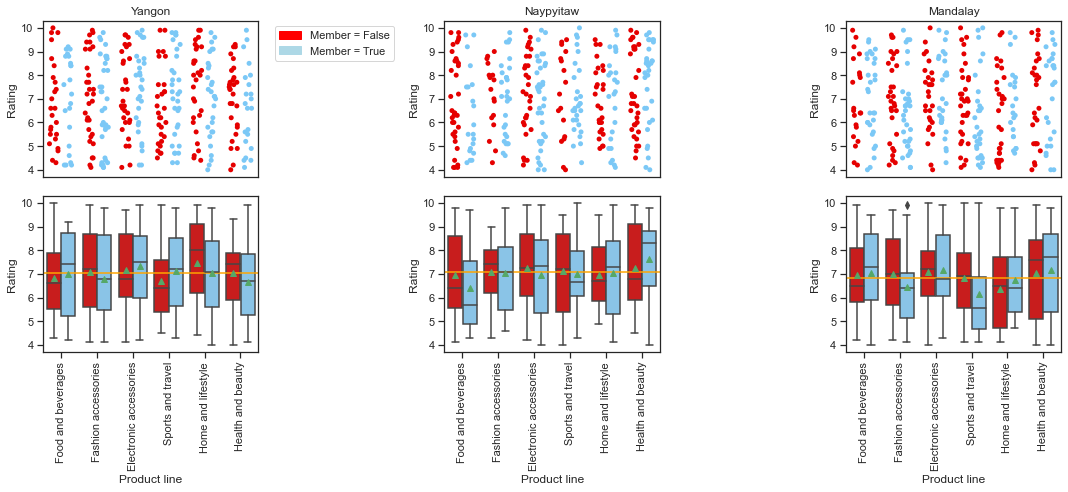

In [20]:
fig, axes = plt.subplots(2, 3, figsize=(15, 7),sharex = True)

colors = ['red','lightblue']
sns.stripplot(ax=axes[0,0],data=Yangon_DF, x='Product line', y='Rating', hue='Member', jitter=0.25,dodge=True, palette=sns.xkcd_palette(colors)).set_title("Yangon")
sns.stripplot(ax=axes[0,1],data=Naypyitaw_DF, x='Product line', y='Rating', hue='Member', jitter=0.25,dodge=True, palette=sns.xkcd_palette(colors)).set_title("Naypyitaw")
sns.stripplot(ax=axes[0,2],data=Mandalay_DF, x='Product line', y='Rating', hue='Member', jitter=0.25,dodge=True, palette=sns.xkcd_palette(colors)).set_title("Mandalay")
#remove the duplicate X axis.
axes[0,0].axes.get_xaxis().set_visible(False)
axes[0,1].axes.get_xaxis().set_visible(False)
axes[0,2].axes.get_xaxis().set_visible(False)

sns.boxplot(ax=axes[1,0],data=Yangon_DF ,x='Product line', y='Rating', hue='Member',showmeans=True , palette=sns.xkcd_palette(colors)).tick_params(axis='x', rotation=90)
sns.boxplot(ax=axes[1,1],data=Naypyitaw_DF, x='Product line', y='Rating', hue='Member', showmeans=True ,palette=sns.xkcd_palette(colors)).tick_params(axis='x', rotation=90)
sns.boxplot(ax=axes[1,2],data=Mandalay_DF, x='Product line', y='Rating', hue='Member', showmeans=True ,palette=sns.xkcd_palette(colors)).tick_params(axis='x', rotation=90)
#add meanline by month
meanRY = Yangon_DF["Rating"].mean()
meanRN = Naypyitaw_DF["Rating"].mean()
meanRM = Mandalay_DF["Rating"].mean()

axes[1,0].axhline(meanRY,color="orange")
axes[1,1].axhline(meanRN,color="orange")
axes[1,2].axhline(meanRM,color="orange")


#making a unit legend
top_bar = mpatches.Patch(color=colors[0], label='Member = False')
bottom_bar = mpatches.Patch(color=colors[1], label='Member = True')
axes[0,0].legend(handles=[top_bar, bottom_bar],bbox_to_anchor= (1.05,1))

#remove al sub legends.
axes[0,1].legend([],[], frameon=False)
axes[0,2].legend([],[], frameon=False)
axes[1,0].legend([],[], frameon=False)
axes[1,1].legend([],[], frameon=False)
axes[1,2].legend([],[], frameon=False)
plt.tight_layout()
plt.show()



>##### Observation 2:
><div style="direction:rtl"> 
על מנת, להבין את מקור הבעיה ניתחנו את הדירוג הממוצע לכל סניף בהתאם למחלוקות השונות ולסוג הלקוח: חבר מועדון/לקוח מזדמן. <br>
בנוסף, הוספנו את פיזור דירוגי הלקוחות על מנת להראות שפיזור הנתונים הוא רחב ואיכותי ואינם קיימים מקרה קצה.  <br>
המשולש הירוק בכל "בר" מסמל את הממוצע דירוג באותה מחלקה והקו הצהוב מסמל את ממוצע הדירוג הכללי בסניף. <br>
לאחר שהבנו שאם נשפר את הדירוג בסניף "מנדלאי" נשפר את הדירוג הכללי של הרשת, אנו בחרנו להתמקד בסניף זה. <br>
מהאיור של סניף "מנדלאי" ניתן לראות שישנה בעייתיות עם מחלקת ספורט וטיולים, ומחלקת בית וסגנון חיים, ביחס לדירוג כלל הלקוחות, חברי מועדון ולקוחות מזדמנים. <br>
נבחר להמליץ למנהל סניף "מנדלאי" או לבעלי הרשת ללמוד על אופי העבודה של סניפים אחרים שמצטיינים במחלקות ספורט וטיולים, ומחלקת בית וסגנון חיים, לדוגמה סניף "נאיפיטאו" וסניף "יאגון" בהתאמה. <br>
בנוסף נוכל להיעזר בסניפים הרשת השונים על מנת לשפר את הרשת כולה, ללמוד על דרכי עבודה, היצע המוצרים, מבצעים לחברי מועדון/לקוחות מזדמנים, מיקום המחלקה בסניף עצמו, סידור המוצרים ועוד. <br>
את ההמלצות ניתן בהתאמה לסניף והמחלקה הספציפית שנרצה לשפר אל מול הסניף והמחלקה המצטיינת. 





</div>

### השוני בין המחלקות לפי מגדר, דירוג וכמות

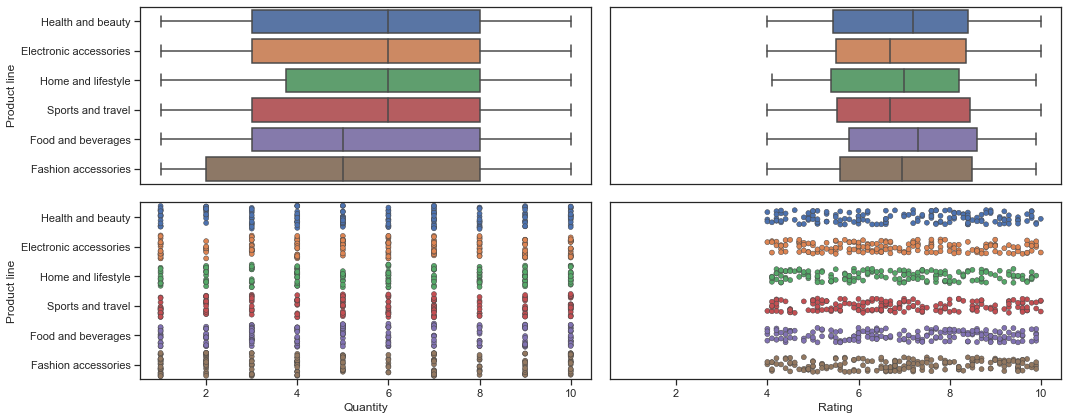

In [26]:
fig, axes = plt.subplots(2, 2, figsize=(15, 6), sharex=True)
sns.boxplot(y = 'Product line', x = 'Quantity', data=supermarket_df,ax=axes[0,0] )
sns.boxplot(y = 'Product line', x = 'Rating', data=supermarket_df,ax=axes[0,1] )
sns.stripplot(x='Quantity', y='Product line', jitter=0.4,data=supermarket_df,linewidth=0.5,ax=axes[1,0])
sns.stripplot(x='Rating', y='Product line', jitter=0.25,data=supermarket_df,linewidth=0.5,ax=axes[1,1])
axes[0,1].axes.get_yaxis().set_visible(False)
axes[1,1].axes.get_yaxis().set_visible(False)
axes[0,0].axes.get_xaxis().set_visible(False)
axes[0,1].axes.get_xaxis().set_visible(False)
plt.tight_layout()
plt.show()


>##### Observation 3:
><div style="direction:rtl"> 
> על ידי התבוננות בכמות קל להבין כי המספר הנמוך ביותר של מוצרים הנמכרים בכל מחלקה נמצא במחלקת "מזון ומשקאות" ו"אופנה ואביזרים" על אף הדירוג הגבוה שכל אחד מהם קיבל.
נוכל להבין כי הבעיה עשויה להימצא בהיצע, לכן נמליץ להגדיל את ההיצע במחלקות אלה בכדי להגדיל את כמות הרכישות במחלקת - "מזון ומשקאות" ומחלקת "אופנה ואביזרים" .

In [22]:
supermarket_df.pivot_table('Quantity',index='Product line', columns=['Gender','Member'],margins=True , aggfunc='sum')  

Gender                 Female        Male         All
Member                  False  True False  True      
Product line                                         
Electronic accessories    280   208   262   221   971
Fashion accessories       273   257   190   182   902
Food and beverages        228   286   218   220   952
Health and beauty         185   158   241   270   854
Home and lifestyle        207   291   214   199   911
Sports and travel         204   292   223   201   920
All                      1377  1492  1348  1293  5510


>##### Observation 4:
><div style="direction:rtl"> 
בחרנו להסתכל בטבלה זו על חברי מועדון ולא חברי מועדון ולראות את היחס בינם לבין סך המכירות בכל אחת מהמחלקות
>ניתן לראות כי אנחנו מושכים לקוחות שאינם חברי מועדון בכמה מחלקות שהמשמעותית בניהן היא מחלקת אביזרי אלקטרוניקה
>כמו כן, במחלקת אוכל ומשקאות אנחנו רואים כי ההפך מתקיים ושחברי מועדון רוכשים יותר ולקוחות שאינם חברי מועדון פחות קונים במחלקה זו
>בכדי להפיק את המיטב אנחנו מציעים שתי דרכי פעולה, הראשונה במחלקות בהן חברי מועדון רוכשים פחות מלוקחות שאינם חברים מועדון הוא לייצר עבור חברי המועדון רווחיות לקנות במחלקות אלה.
>פעולה נוספת היא לבצע במחלקות שחברי מועדון קונים יותר מבצעים מוגברים ולהגדיל את המכירות לחברי מועדון וללא חברי מועדון על ידי הצטרפות חדשה של לקוחות למועדון או קנייה מוגברת של חברי מועדון קיימים.


Visualize the table:
- Put 2 barplots in 1 frame, first one for all customers (seperate by gender), second one same but just for members.  .
<p>
- Making new legend outside by `plt.legend`.

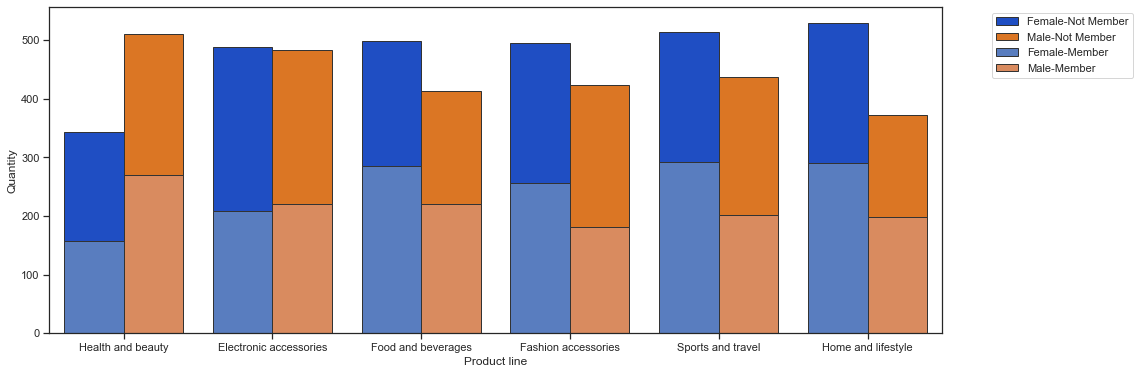

In [23]:
plt.figure(figsize=(16, 6))
colors = ["blue","orange"]
sns.barplot(x="Product line",  y="Quantity",hue='Gender', data=supermarket_df, edgecolor=".2", estimator=sum, ci=None, palette=sns.xkcd_palette(colors))

Members = supermarket_df[supermarket_df.Member==True] #bottom bar ->  take only Member =True values from the data
# bar2 - bottom bars (group of 'Member=True')
sns.barplot(x="Product line", y="Quantity",hue='Gender', data=Members, palette="muted", estimator=sum, ci=None, edgecolor=".2",errcolor=".2",color='lightblue').legend([],[], frameon=False)
plt.legend(loc='upper left', labels=['Female-Not Member',"Male-Not Member",'Female-Member',"Male-Member"],bbox_to_anchor= (1.05,1))
plt.show()

>##### Observation 5:
><div style="direction:rtl"> 
>למרות שאין הבדלים משמעותיים בגרף בין חברי מועדון ללא חברי מועדון בין המחלקות השונות, נראה שבמגדר יש הבדלים יותר משמעותיים
> עולה כי, במחלקת "יופי ובריאות" גברים רוכשים הכי הרבה ונשים קונות הכי הרבה במחקלת "בית וסגנון חיים".
>למרות שאנו לא יודעים להצביע על הסיבה שגברים קונים הכי הרבה ב"מחלקת בריאות ויופי" המלצתנו תהיה כי יש להגדיל את ההיצע במחלקות אלו לנשים ולגברים בהתאמה.
>בהגדלת ההיצע עבור כל מגדר נוכל להגיע לקהל לקוחות גדול יותר ולהגדיל את המכירות. 
